In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tftb
import scipy.signal as sig
from csaps import csaps
from sklearn.model_selection import KFold
import pywt

from utils.preprocessing import load_data,center_data
from utils.plotting import plot_single, plot_setup

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.signal import savgol_filter

In [4]:
df = load_data('./data/Geo_Mag_Vari_Odessa_25-31_Jan_2018.txt')
df['y_centered'] = center_data(df.By)
myfigsize = (14,4)

c:\Users\Admin\diploma\utils\plotting.py:202: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


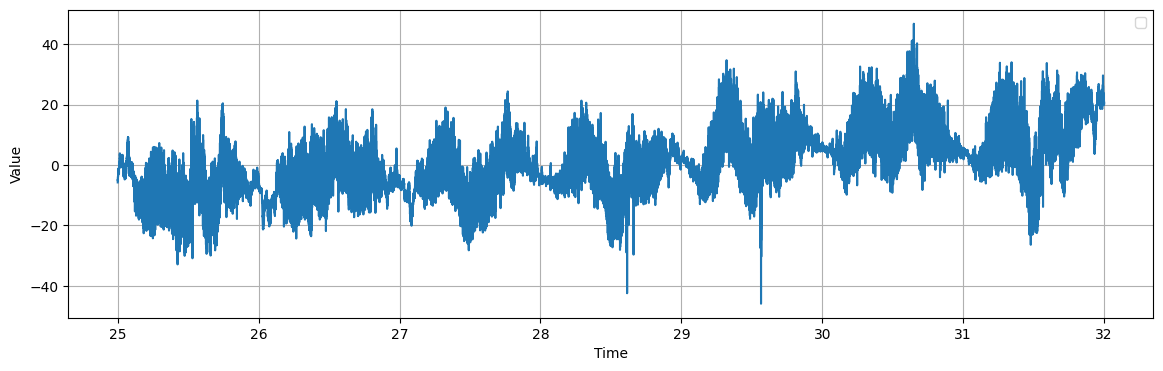

In [5]:
plt.figure(figsize=myfigsize)
plt.plot(df.Time, df.y_centered)
plot_setup()

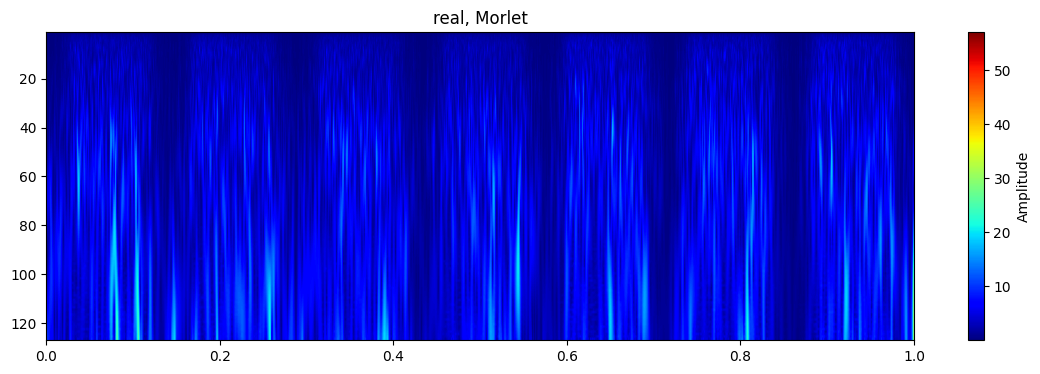

In [6]:
rate=10
t = df.Time[::rate]
signal = df.y_centered[::rate]

scales = np.arange(1, 128) 
coefficients, frequencies = pywt.cwt(signal, scales, 'morl', 1/(60*60*24))
plt.figure(figsize=myfigsize)
plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, 1, scales[-1], scales[0]],
           cmap='jet')
plt.colorbar(label="Amplitude")
plt.title("real, Morlet")
plt.show()


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


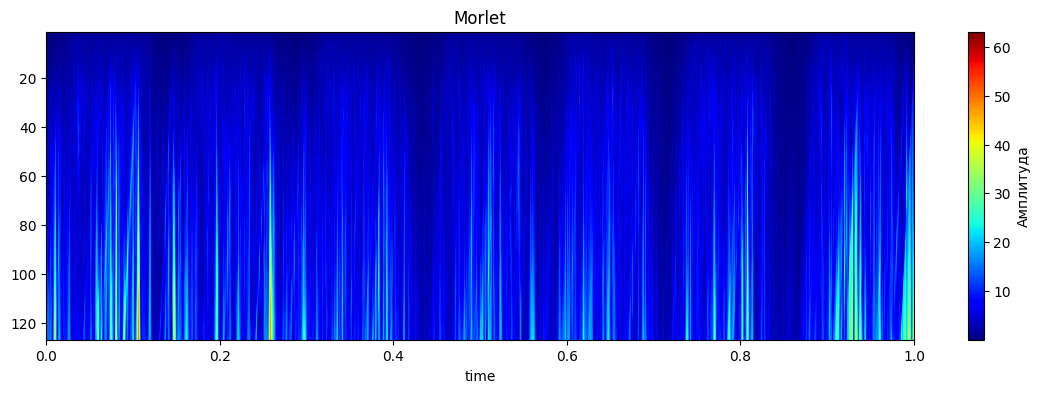

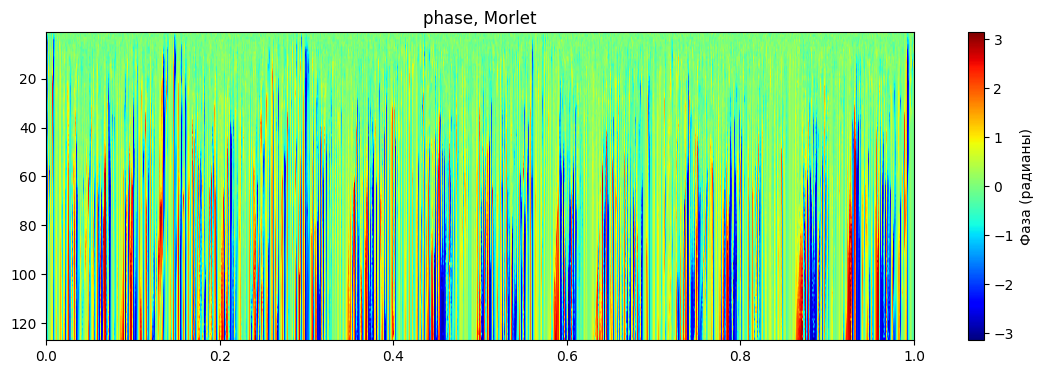

In [7]:
coefficients_complex, _ = pywt.cwt(signal, scales, 'cmor', 1/1000)

plt.figure(figsize=myfigsize)
plt.imshow(np.abs(coefficients_complex), aspect='auto', extent=[0, 1, scales[-1], scales[0]],
           cmap='jet')
plt.colorbar(label="Амплитуда")
plt.xlabel("time")
plt.title("Morlet")
plt.show()

plt.figure(figsize=myfigsize)
plt.imshow(np.angle(coefficients_complex), aspect='auto', extent=[0, 1, scales[-1], scales[0]],
           cmap='jet')
plt.colorbar(label="Фаза (радианы)")
plt.title("phase, Morlet")
plt.show()


In [16]:

def plot_wavelet_spectrum(wavelet_name):
    coefficients, frequencies = pywt.cwt(signal, scales, wavelet_name, 1/1000)

    plt.figure(figsize=myfigsize)
    plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, 1, scales[-1], scales[0]],
            cmap='jet')
    plt.colorbar(label="Amplitude")
    plt.xlabel("Time")
    plt.title(f"Wavelet Spectrum (Complex {wavelet_name})")
    plt.show()

    # Plot phase spectrum
    plt.figure(figsize=myfigsize)
    plt.imshow(np.angle(coefficients), aspect='auto', extent=[0, 1, scales[-1], scales[0]],
            cmap='jet')
    plt.colorbar(label="Phase (radians)")
    plt.xlabel("Time")
    plt.title(f"Phase Spectrum (Complex {wavelet_name})")
    plt.show()


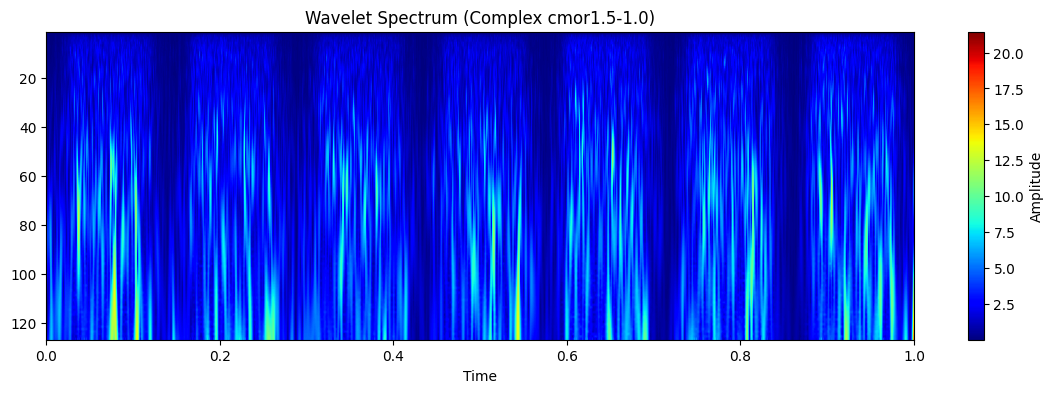

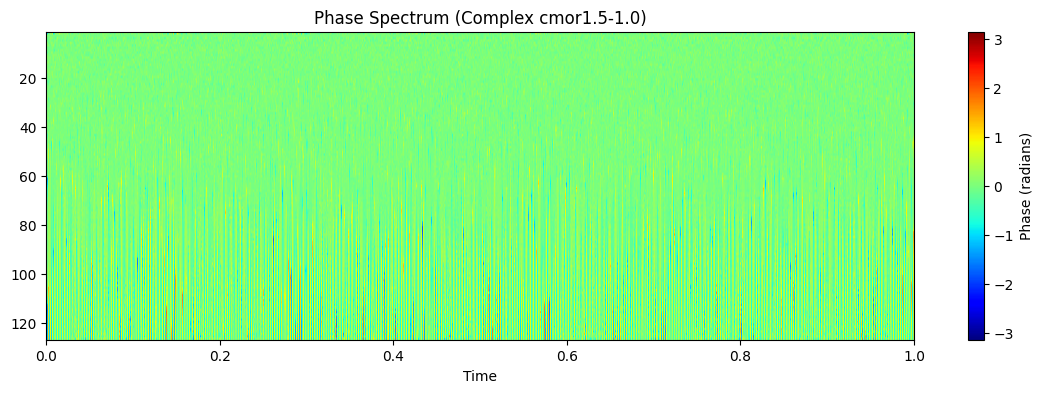

In [17]:
plot_wavelet_spectrum(wavelet_name = 'cmor1.5-1.0')

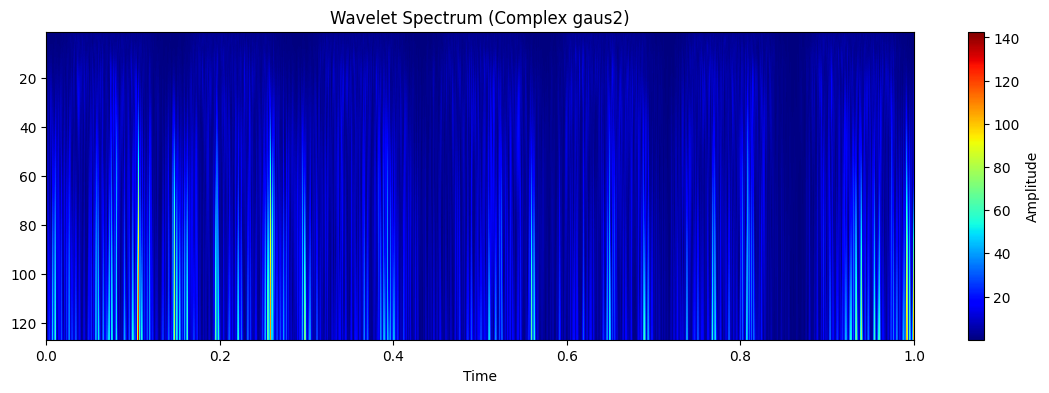

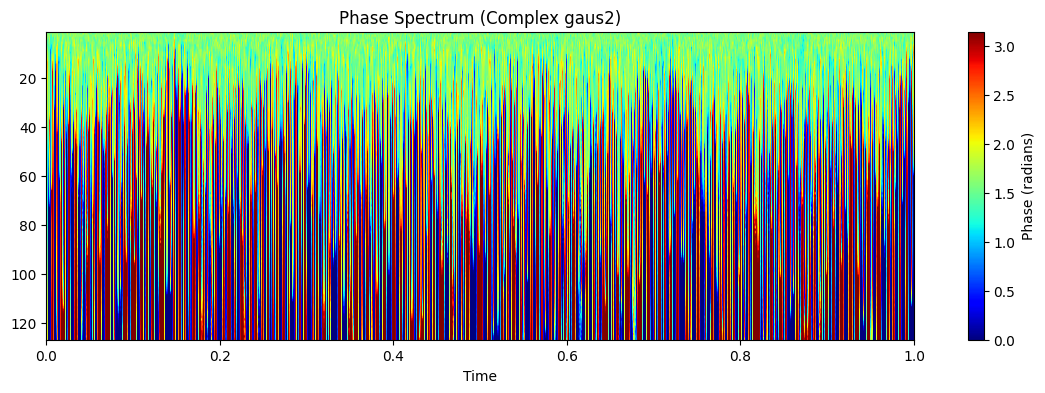

In [18]:
plot_wavelet_spectrum(wavelet_name = 'gaus2')